## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC as svc
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.shape

(100, 8)

In [4]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [5]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

# Task 1 Logistic Regression

## 1.1 Collinearity

### 1.1(a) Finding collinearity between the points

In [6]:
corr = data.corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


### 1.1(b) Plotting heat map

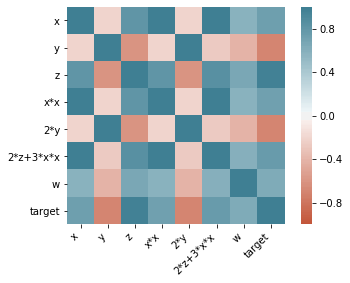

In [7]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2 Finding the best model

### 2.1 Training Logistic Regression Model

In [8]:
parameters = {'alpha': np.logspace(0.0001,1,50)}
lr = SGDClassifier(eta0=0.0001, loss='log', random_state=15, tol=1e-3, learning_rate='constant')
clf = GridSearchCV(lr,parameters, cv = 5,)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0001,
                                     fit_intercept=True, l1_ratio=0.15,
                                     learning_rate='constant', loss='log',
                                     max_iter=1000, n_iter_no_change=5,
                                     n_jobs=None, penalty='l2', power_t=0.5,
                                     random_state=15, shuffle=True, tol=0.001,
                                     validati...
        3.23782268,  3.39358853,  3.556848  ,  3.72796159,  3.90730714,
        4.09528069,  4.29229731,  4.49879204,  4.71522087,  4.9420617 ,
        5.17981544,  5.42900708,  5.69018689,  5.96393159,  6.25084566,
        6.55156264,  6.86674659,  7.19709347,  7.54333274,  7.90622897,
        8.28658349,  8.685236

### 2.2 Finding Best Hyper parameter

In [9]:
# View best hyperparameters
best_penalty = clf.best_estimator_.get_params()['penalty']
print('Best Penalty:',best_penalty )
best_alpha = clf.best_estimator_.get_params()['alpha']
print('Best alpha:', best_alpha)

Best Penalty: l2
Best alpha: 1.0002302850208247


### 2.3 Training LR model based on Best Hyper Parameter

In [11]:
best_model = SGDClassifier(eta0=0.0001, alpha=1.0002302850208247, loss='log', random_state=15, penalty='l2', tol=1e-3, learning_rate='constant')
best_model.fit(X,Y)

SGDClassifier(alpha=1.0002302850208247, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
predictions = best_model.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
best_model_accuracy = accuracy_score(Y, predictions)
print('accuracy of best_model: ',best_model_accuracy)

accuracy of best_model:  1.0


In [14]:
best_model_weight = best_model.coef_
print('best_weight = ',best_model_weight)


best_weight =  [[ 0.14472317 -0.15007918  0.20768387  0.14215358 -0.15007918  0.15301366
   0.12834134]]


## 3 Modifying Original Data

### 3.1 Adding Noise to Original Data

In [15]:
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [100,7]) 

In [16]:
X_new = X + noise

### 3.2 Training best model with new dataset

In [17]:
best_model.fit(X_new,Y)

SGDClassifier(alpha=1.0002302850208247, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
predict_new = best_model.predict(X_new)

In [19]:
from sklearn.metrics import accuracy_score
best_model_accuracy_edited = accuracy_score(Y, predict_new)
print('accuracy of best_model with noised data: ',best_model_accuracy_edited)

accuracy of best_model with noised data:  1.0


In [20]:
best_model_weight_edited = best_model.coef_
print('best_weight with noised data: ',best_model_weight_edited)

best_weight with noised data:  [[ 0.14467011 -0.1497873   0.20790616  0.14222227 -0.1501927   0.15299436
   0.12849912]]


## 4 Checking deviations in metric and weights 

### 4.1 Accuracy difference

In [21]:
print('difference between best_model_accuracy_edited and best_model_accuracy', best_model_accuracy_edited - best_model_accuracy)

difference between best_model_accuracy_edited and best_model_accuracy 0.0


### 4.2 Weight difference

In [22]:
print('absolute change between each value of best_model_Weight_edited and best_model_Weight',np.absolute(best_model_weight_edited - best_model_weight))

absolute change between each value of best_model_Weight_edited and best_model_Weight [[5.30618521e-05 2.91879185e-04 2.22284279e-04 6.86908695e-05
  1.13521096e-04 1.92975358e-05 1.57780775e-04]]


Observation:
1. Deviation in weights after adding noise is in range of 10^-5.
2. Noise has very little effect on weights.
3. Noise effect is less pronounced when compare to Linear SVM.

# Task 2 Linear SVM

## 2 Finding the best model

### 2.1 Training a Linear SVM

In [23]:
parameters = {'C': np.logspace(0.0001,1,50)}
ln_svm = svc(penalty='l2', loss='hinge', dual=True, tol=0.0001, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf = GridSearchCV(ln_svm,parameters, cv = 5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='hinge', max_iter=1000, multi_class='ovr',
                                 penalty='l2', random_state=None, tol=0.0001,
                                 verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1.00023029,  1.04834957,  1.09878379,  1.15164431,  1.20704786,
        1.265116...
        3.23782268,  3.39358853,  3.556848  ,  3.72796159,  3.90730714,
        4.09528069,  4.29229731,  4.49879204,  4.71522087,  4.9420617 ,
        5.17981544,  5.42900708,  5.69018689,  5.96393159,  6.25084566,
        6.55156264,  6.86674659,  7.19709347,  7.54333274,  7.90622897,
        8.28658349,  8.68523618,  9.10306733,  9.5409996 , 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

### 2.2 Finding Best Hyper parameter

In [24]:
# View best hyperparameters
print('Best Penalty:', clf.best_estimator_.get_params()['penalty'])
print('Best C:', clf.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0002302850208247


### 2.3 Training LR model based on Best Hyper Parameter

In [25]:
best_model = svc(penalty='l2', loss='hinge', dual=True, tol=0.0001,C = 1.0002302850208247, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

best_model.fit(X,Y)

LinearSVC(C=1.0002302850208247, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [26]:
predictions = best_model.predict(X)

In [27]:
from sklearn.metrics import accuracy_score
best_model_accuracy = accuracy_score(Y, predictions)
print('accuracy of best_model: ',best_model_accuracy)

accuracy of best_model:  1.0


In [28]:
best_model_weight = best_model.coef_
print('best_weight = ',best_model_weight)

best_weight =  [[ 0.37850887 -0.31556433  0.97446776  0.2814556  -0.31556433  0.37096225
   0.27877924]]


## Modifying Original Data

### 3.1 Adding Noise to Original Data

In [29]:
mu, sigma = 0, 0.01
noise = np.random.normal(mu, sigma, [100,7]) 

In [30]:
X_new = X + noise

### 3.2 Training best model with new dataset

In [31]:
best_model.fit(X_new,Y)

LinearSVC(C=1.0002302850208247, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [32]:
predict_new = best_model.predict(X_new)

In [33]:
from sklearn.metrics import accuracy_score
best_model_accuracy_edited = accuracy_score(Y, predict_new)
print('accuracy of best_model with noised data: ',best_model_accuracy_edited)

accuracy of best_model with noised data:  1.0


In [34]:
best_model_weight_edited = best_model.coef_
print('best_weight with noised data: ',best_model_weight_edited)

best_weight with noised data:  [[ 0.39254842 -0.3283196   0.97205589  0.29039811 -0.31583806  0.37671047
   0.284738  ]]


# 4 Checking deviations in metric and weights

### 4.1 Accuracy difference

In [35]:
print('difference between best_model_accuracy_edited and best_model_accuracy', best_model_accuracy_edited - best_model_accuracy)

difference between best_model_accuracy_edited and best_model_accuracy 0.0


### 4.2 Weight difference

In [36]:
print('absolute change between each value of best_model_Weight_edited and best_model_Weight',np.absolute(best_model_weight_edited - best_model_weight))

absolute change between each value of best_model_Weight_edited and best_model_Weight [[0.01403955 0.01275527 0.00241187 0.00894251 0.00027373 0.00574822
  0.00595876]]


Observation:
1. Deviation in weights after adding noise is in range of 10^-2.
2. Linear SVM is more affected by noise then Logistic regression.